In [1]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
covid= pd.read_csv('./time_series_covid19_confirmed_global.csv', delimiter= ",")
germany_data = covid[covid["Country/Region"] == "Germany"]

In [3]:
relevantDates = germany_data.keys()[9:87]

In [4]:
yData = []
for date in relevantDates:
    yData.append(int(germany_data[date].values))
xData = [n for n in range(0,len(yData))]

In [5]:
def gompertzFct(x, N, r, t0):
    return N * np.exp(-np.exp(-r * (x-t0)))

In [6]:
t_trn = np.array(xData)
I_trn = np.array(yData)

guess = (100000., .1, 50.)

parameters, covariance = opt.curve_fit(gompertzFct, t_trn, I_trn, p0=guess)

In [7]:
I = gompertzFct(t_trn, *parameters)

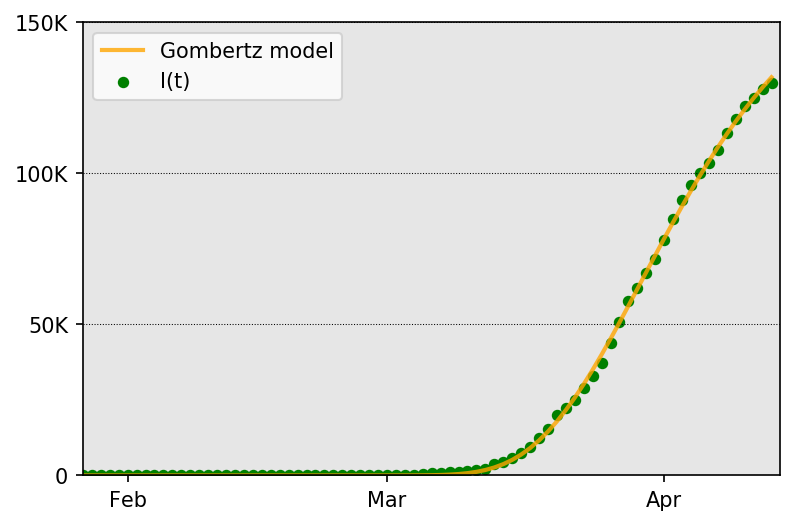

In [8]:
fig = plt.figure(dpi=150)
ax1 = fig.add_subplot(111)

ax1.plot(xData, I, c="orange", label="Gompertz model", alpha=0.8, linewidth=2)
ax1.scatter(xData,yData, c="green", label="I(t)", s=20)
plt.legend(loc="upper left")
xPositions = (5, 34, 65)
xLabels = ("Feb", "Mar", "Apr")
yPositions = (0,50000,100000,150000)
yLabels = ("0","50K", "100K", "150K")
ax1.set_ylim(0, 150000)
ax1.set_xlim(0, len(xData))
plt.xticks(xPositions, xLabels)
plt.yticks(yPositions, yLabels)
for yPos in yPositions:
    ax1.hlines(yPos, 0, len(xData), linewidth=0.5, linestyle="dotted")
ax1.set_facecolor("0.9")
plt.show()

In [9]:
datesTillEndJune = germany_data.keys()[9:165]
yData = []
for date in datesTillEndJune:
    yData.append(int(germany_data[date].values))
xData = [n for n in range(0,len(yData))]

t_trn = np.array(xData)
I = gompertzFct(t_trn, *parameters)

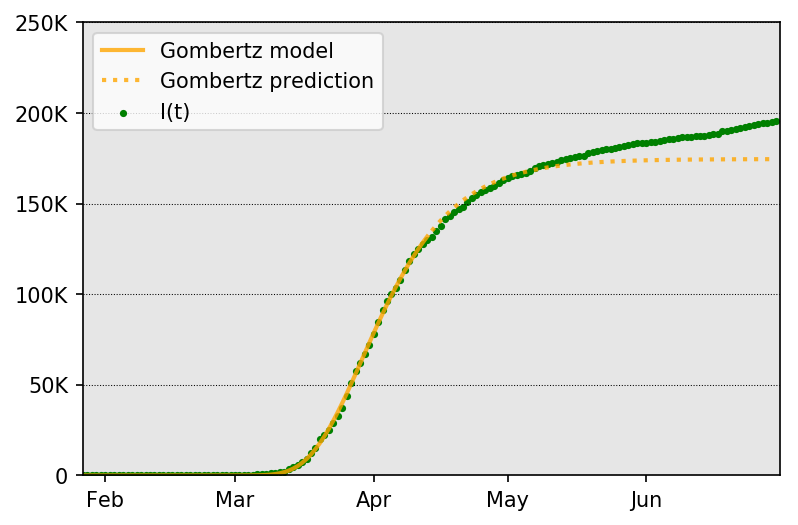

In [10]:
fig = plt.figure(dpi=150)
ax1 = fig.add_subplot(111)

ax1.plot(xData[:78], I[:78], c="orange", label="Gompertz model", linewidth=2, alpha=0.8)
ax1.plot(xData[78:], I[78:], c="orange", label="Gompertz prediction", linewidth=2, linestyle=":", alpha=0.8)
ax1.scatter(xData,yData, c="green", label="I(t)", s=6)
plt.legend(loc="upper left")
xPositions = (5, 34, 65, 95, 126)
xLabels = ("Feb", "Mar", "Apr", "May", "Jun")
yPositions = (0,50000,100000,150000, 200000, 250000)
yLabels = ("0","50K", "100K", "150K", "200K", "250K")
ax1.set_ylim(0, 250000)
ax1.set_xlim(0, len(xData))
plt.xticks(xPositions, xLabels)
plt.yticks(yPositions, yLabels)
for yPos in yPositions:
    ax1.hlines(yPos, 0, len(xData), linewidth=0.5, linestyle="dotted")
ax1.set_facecolor("0.9")
plt.show()